In [31]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
import matplotlib.pyplot as plt
import random
import math
import matplotlib
matplotlib.style.use('ggplot')

import os
os.chdir("C:/Users/olesh/Documents/programs/transopt_routing/mary")
import json



%matplotlib inline


In [32]:
os.environ['NUMEXPR_NUM_THREADS'] = '24'

## TEST

In [33]:
df = pd.read_csv('data_vertex.csv', sep = ' ')
df

,freq,volume,lat,lon
0,0.0,0.00,0.000000,0.000000
1,1.0,3.00,-7.456729,11.286202
2,1.0,3.00,-7.887101,8.351324
3,1.0,5.50,-35.235300,21.868680
4,1.0,2.25,-33.095056,11.704452
...,...,...,...,...
1465,2.0,4.50,-2.095575,-4.352782
1466,1.0,2.25,13.734431,6.251102
1467,1.0,1.50,8.347999,5.568021
1468,1.0,1.50,10.869338,5.883266


In [34]:
df.describe()

,freq,volume,lat,lon
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.265306,2.850486,-11.842256,13.561485
std,0.474346,1.599382,20.668912,19.214986
min,0.000000,0.000000,-45.160284,-20.082136
25%,1.000000,1.500000,-26.740478,-0.472756
50%,1.000000,2.250000,-17.174207,10.180191
75%,2.000000,3.300000,-2.936384,23.741762
max,3.000000,12.750000,50.867495,57.880476


In [35]:
X = df['lat']
Y = df['lon']

In [55]:
def get_routs(routs_index):
    routs = []
    for rout in routs_index:
        rout_X = []
        rout_Y = []
        for vertex in rout:
            rout_X.append(X[vertex])
            rout_Y.append(Y[vertex])
        routs.append([rout_X, rout_Y])
    return routs

def get_rout_index():
    file_rout = open('res.txt', 'r')
    routs_str = file_rout.read().split(';')
    routs = []
    for rout_str in routs_str:
        if rout_str == '':
            continue
        vertexes_str = rout_str.split(' ')
        vertexes = []
        for vertex_str in vertexes_str:
            if vertex_str == '':
                continue
            vertexes.append(int(vertex_str))
        routs.append(vertexes)
    return routs

def get_rout_index_with_clust():
    routs_clust = []
    file_clust = open('res_clust.txt', 'r')
    routs_clust_str = file_clust.read().split(':')
    for routs_str in routs_clust_str:
        if routs_str == '':
                continue
        routs = []

        for rout_str in routs_str.split(';'):
            if rout_str == '':
                continue
            vertexes_str = rout_str.split(' ')
            vertexes = []
            for vertex_str in vertexes_str:
                if vertex_str == '':
                    continue
                vertexes.append(int(vertex_str))
            routs.append(vertexes)
        routs_clust.append(routs)
    return routs_clust
    

In [56]:
get_rout_index_with_clust()

[[[0, 233, 334, 328, 332, 255, 331, 330, 166, 157, 0],
  [0, 155, 122, 254, 262, 261, 123, 120, 161, 0],
  [0, 463, 434, 635, 634, 637, 644, 643, 642, 750, 542, 541, 519, 0],
  [0, 232, 835, 235, 173, 211, 212, 213, 210, 40, 0],
  [0, 83, 31, 237, 87, 238, 234, 323, 39, 0],
  [0, 84, 85, 86, 1102, 1262, 1260, 226, 135, 0],
  [0, 20, 25, 19, 256, 17, 16, 61, 176, 336, 0],
  [0, 641, 645, 370, 543, 589, 499, 498, 152, 151, 138, 588, 580, 497, 0],
  [0, 154, 259, 329, 175, 18, 251, 385, 384, 383, 156, 0],
  [0, 209, 252, 62, 174, 29, 30, 63, 28, 518, 0],
  [0, 1261, 1259, 225, 1438, 1439, 309, 1440, 275, 141, 0],
  [0, 118, 258, 68, 273, 335, 272, 92, 723, 271, 270, 548, 0],
  [0, 184, 183, 337, 223, 69, 24, 313, 23, 22, 180, 182, 177, 149, 547, 0],
  [0, 587, 586, 585, 150, 158, 314, 160, 119, 0],
  [0, 382, 381, 380, 379, 42, 41, 77, 246, 76, 27, 516, 0],
  [0, 64, 189, 325, 65, 165, 66, 224, 51, 324, 563, 0],
  [0, 549, 584, 482, 748, 407, 697, 788, 752, 488, 616, 569, 369, 560, 0],
  

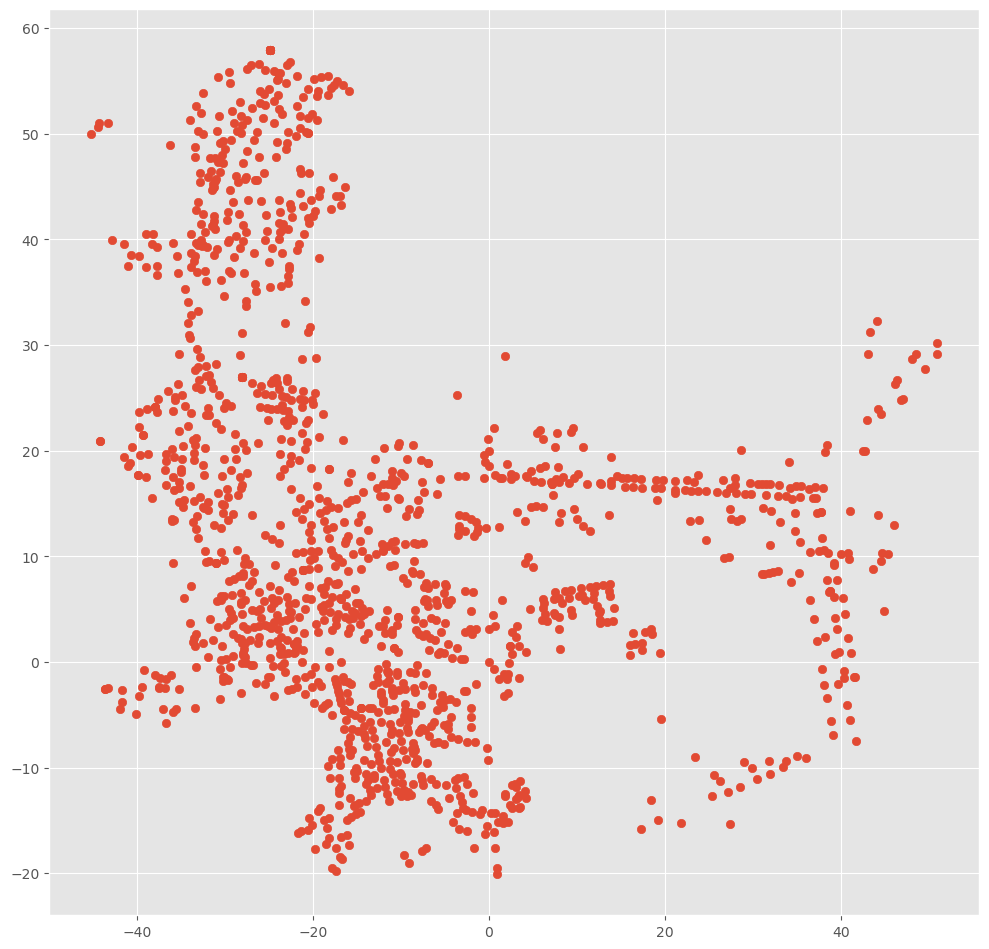

In [38]:
fig = plt.figure(figsize=(12,12), dpi=100)

scatter(X,Y)

## read cluster

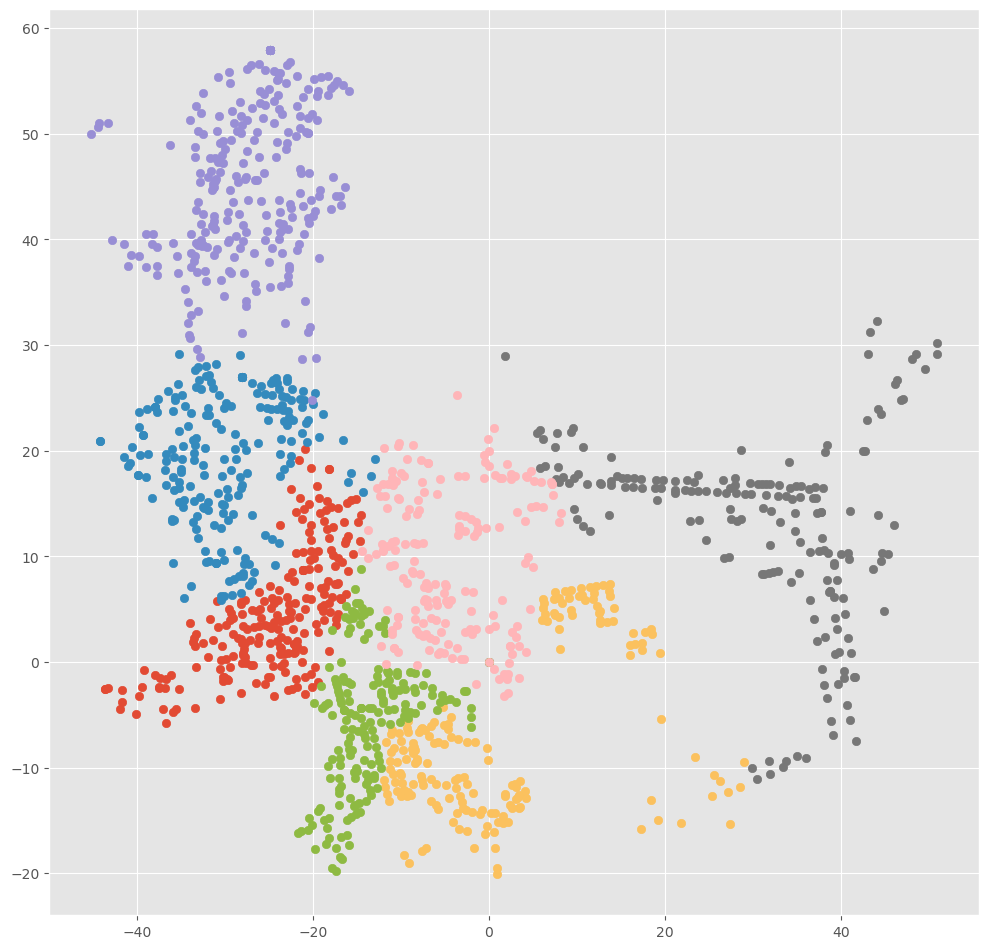

In [9]:
file_clust = open('cluster.txt', 'r')
clusters_str = file_clust.read().split(';')
clusters = []

for clust_str in clusters_str:
    vertexes_str = clust_str.split(' ')
    vertexes = []
    for vertex_str in vertexes_str:
        vertexes.append(int(vertex_str))
    clusters.append(vertexes)
    
fig = plt.figure(figsize=(12,12), dpi=100)

for clust in clusters:
    x = df.iloc[clust]['lat']
    y = df.iloc[clust]['lon']
    scatter(x,y)
        

## clust test result

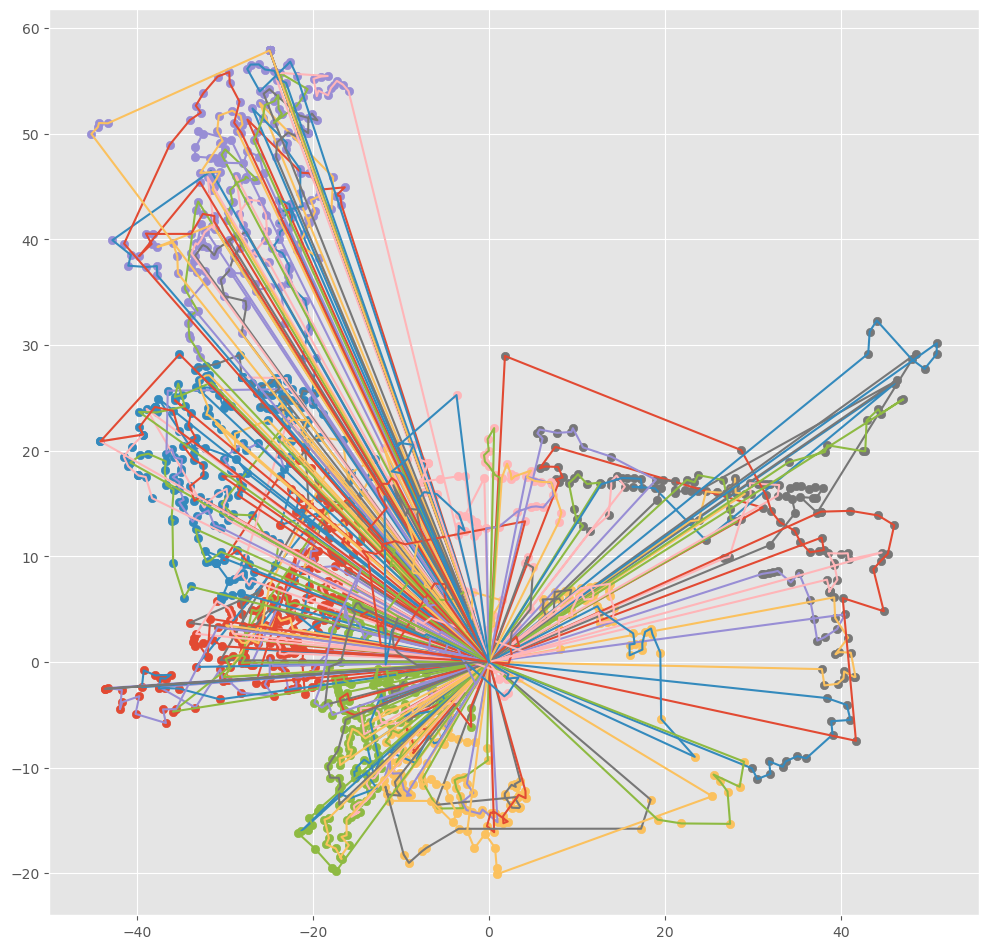

In [58]:
# greedy_test
# lenght: 28556.2

routs_clust_index = routs_clust_index = get_rout_index_with_clust()


fig = plt.figure(figsize=(12,12), dpi=100)
for clust in clusters:
    x = df.iloc[clust]['lat']
    y = df.iloc[clust]['lon']
    scatter(x,y)

for routs_index in routs_clust_index:
    routs = get_routs(routs_index)
    for rout in routs:
        plt.plot(rout[0], rout[1])
    

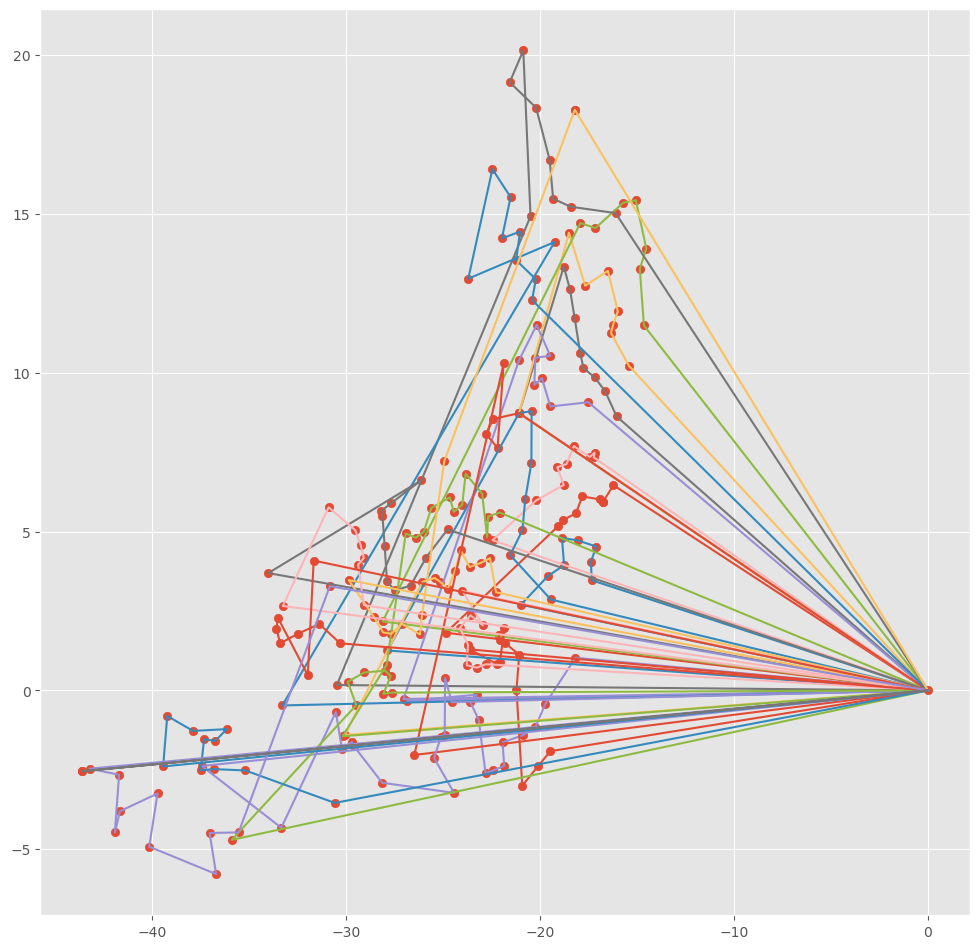

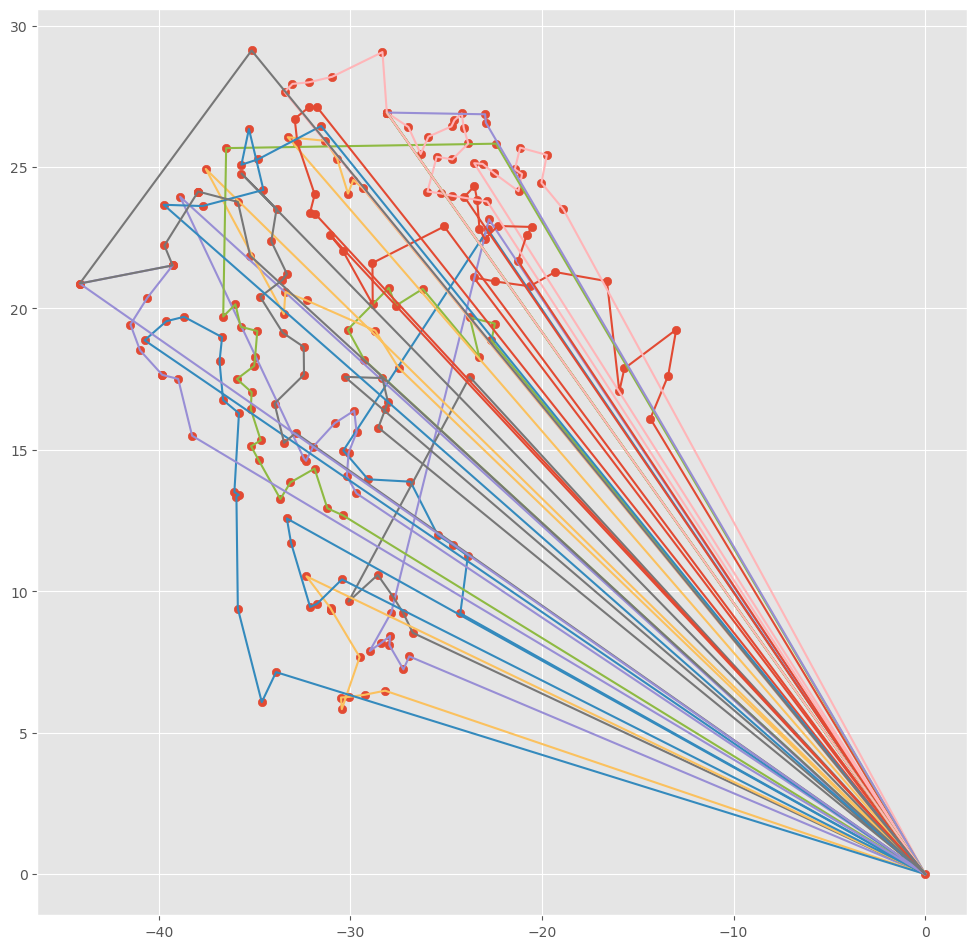

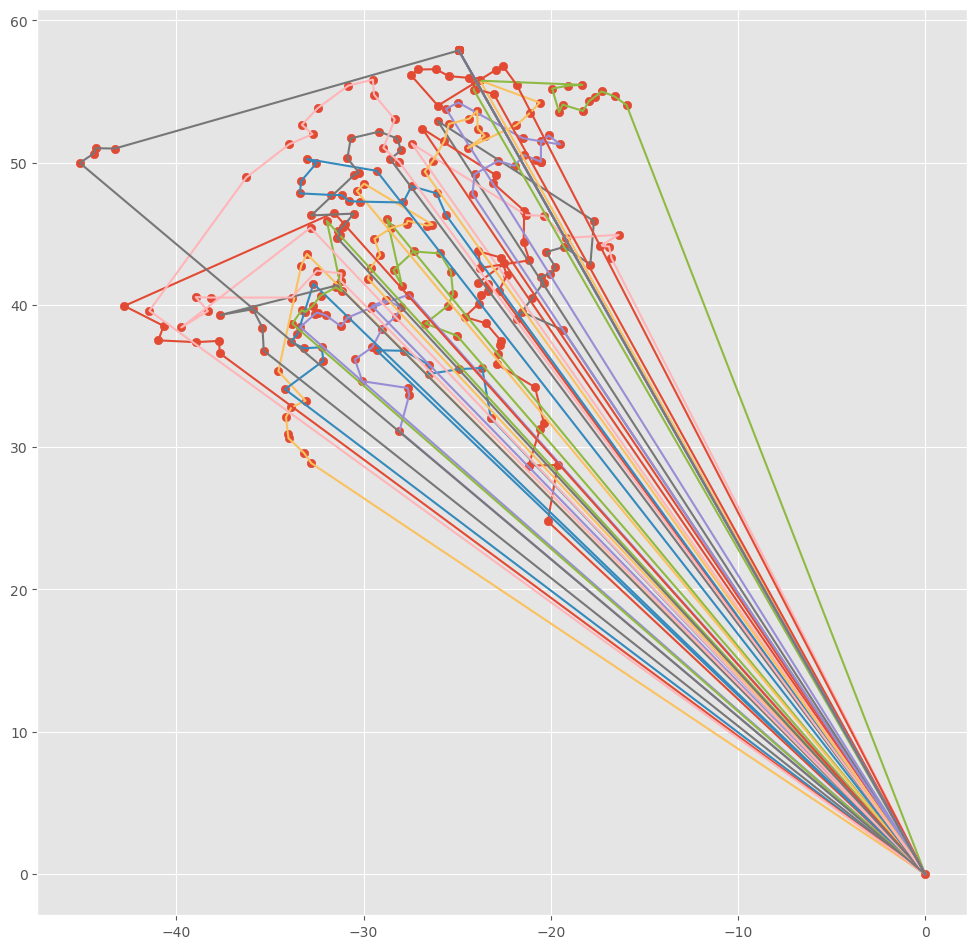

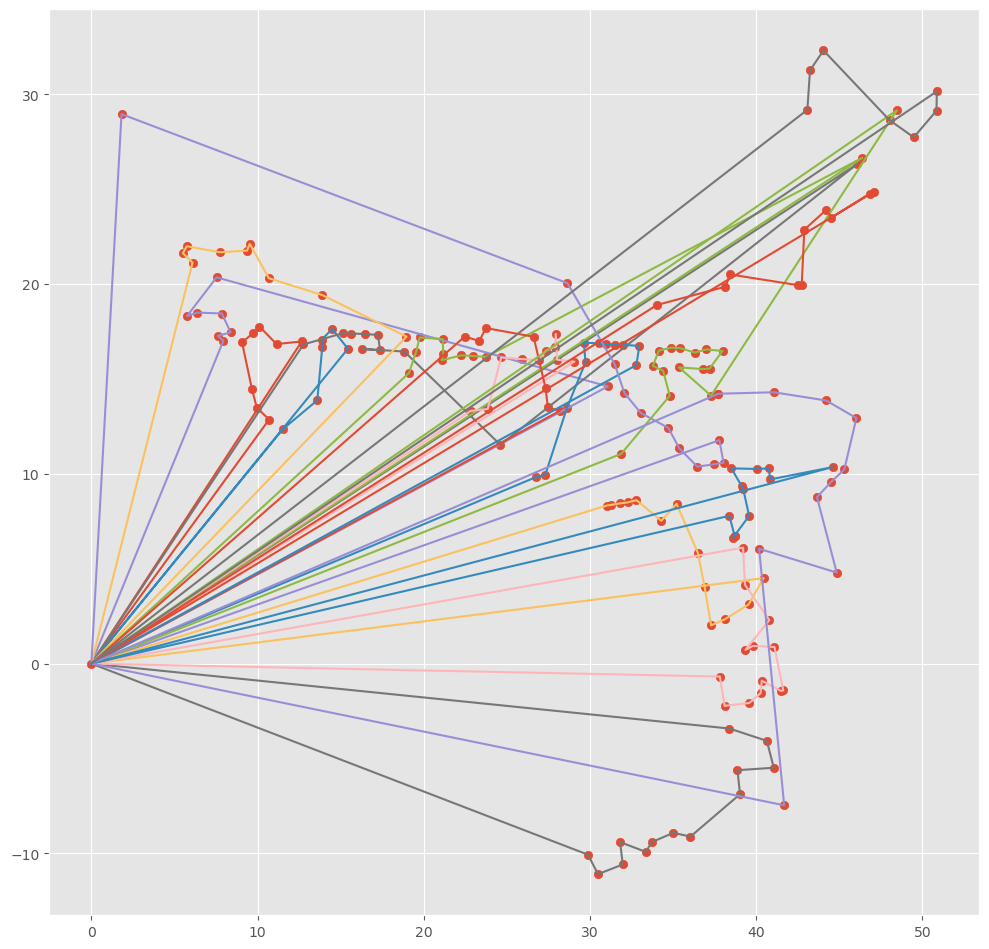

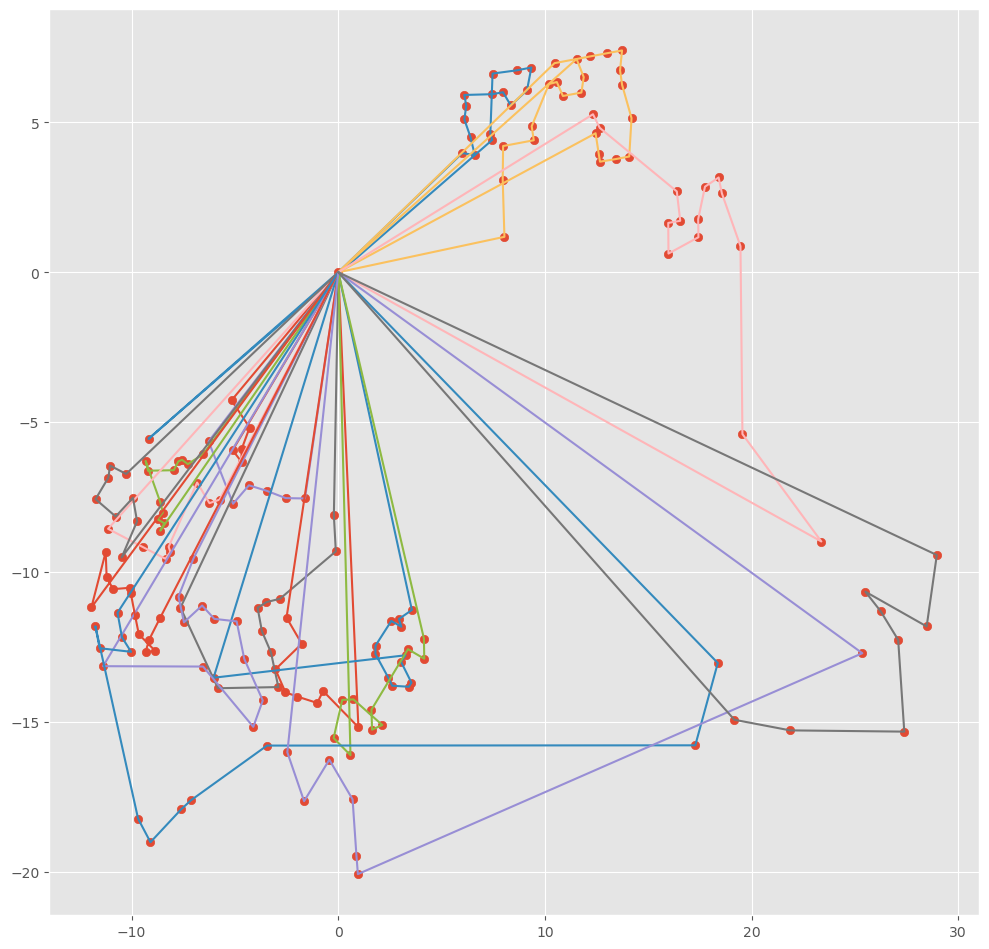

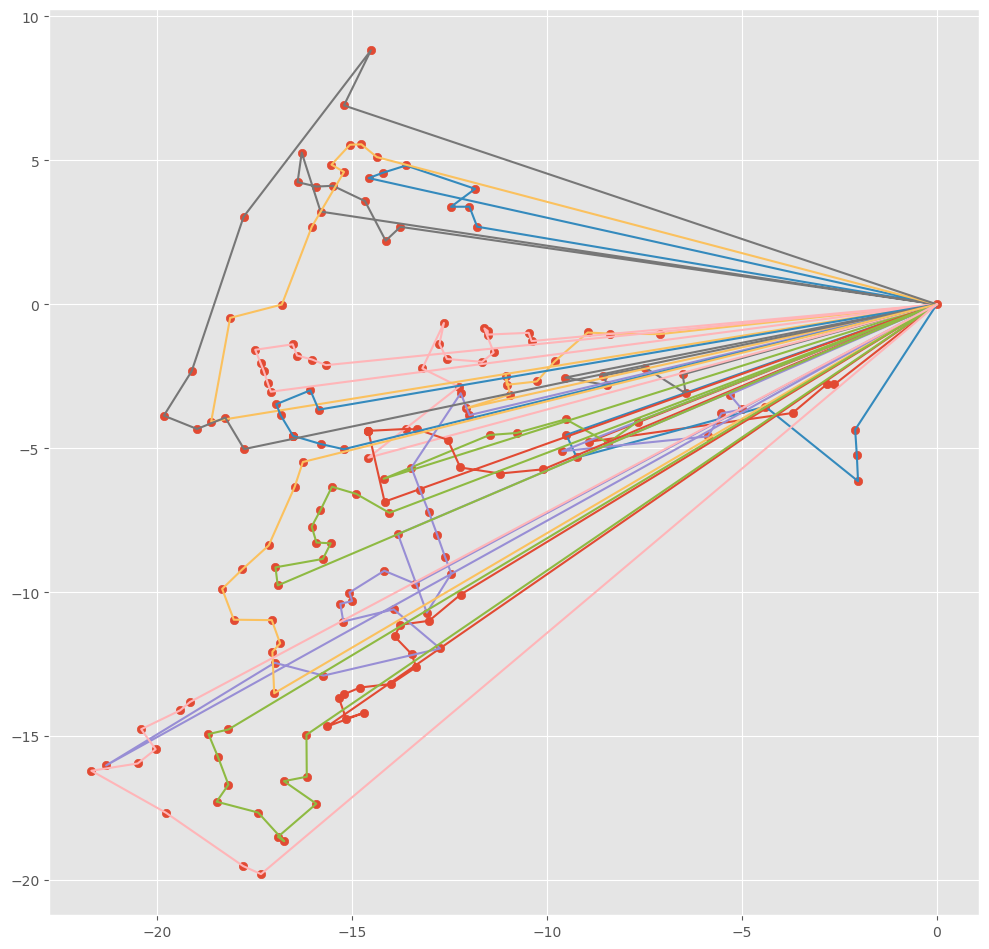

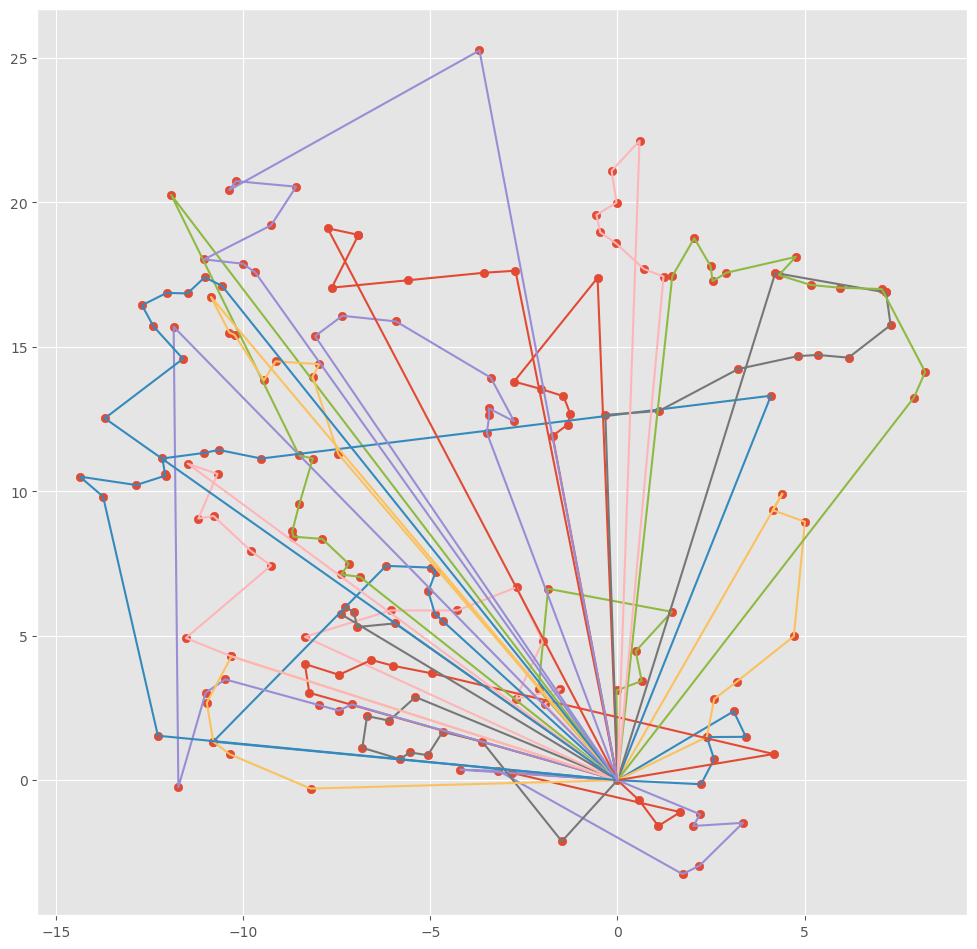

In [61]:
# greedy_test
# lenght: 28556.2

routs_clust_index = routs_clust_index = get_rout_index_with_clust()

for i in range(len(routs_clust_index)):
    fig = plt.figure(figsize=(12,12), dpi=100)

    x = df.iloc[clusters[i]]['lat']
    y = df.iloc[clusters[i]]['lon']
    scatter(x,y)

    routs = get_routs(routs_clust_index[i])
    for rout in routs:
        plt.plot(rout[0], rout[1])
    

## test result

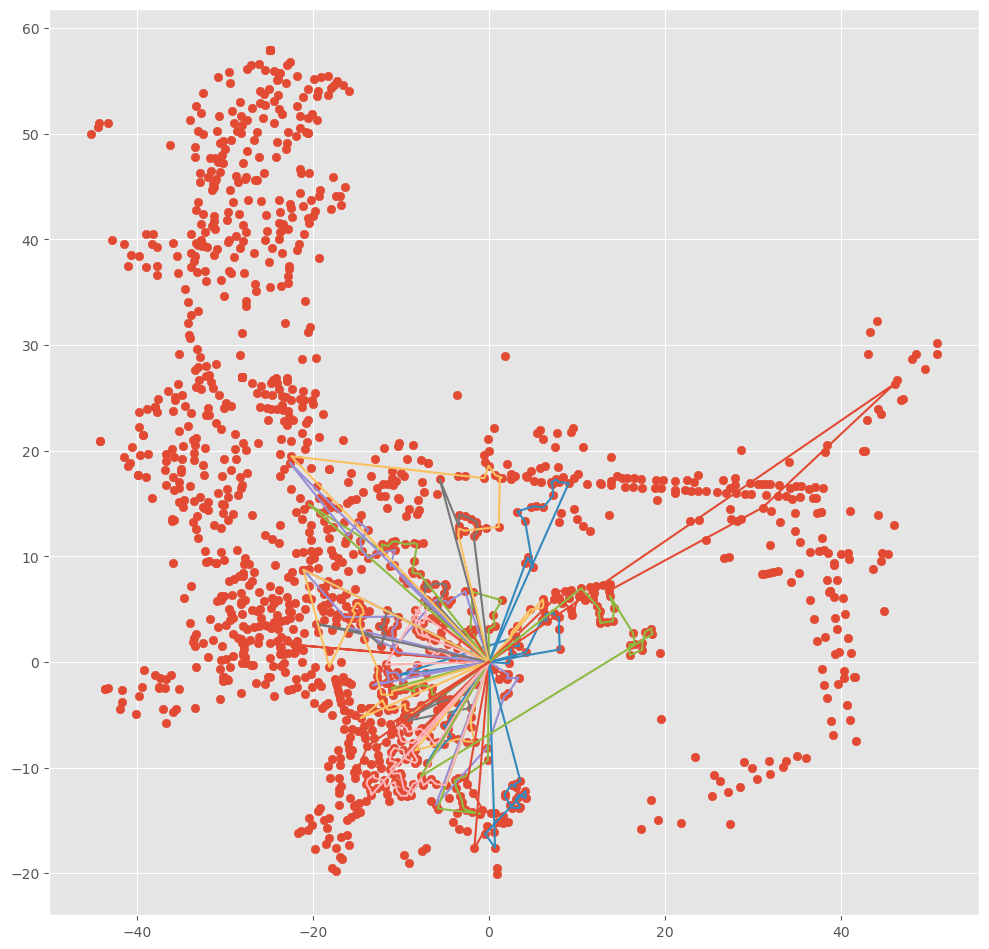

In [52]:
routs_index = get_rout_index()
fig = plt.figure(figsize=(12,12), dpi=100)

routs = get_routs(routs_index)
scatter(X,Y)
for rout in routs:
    plt.plot(rout[0], rout[1])
# lenght: 37338.6